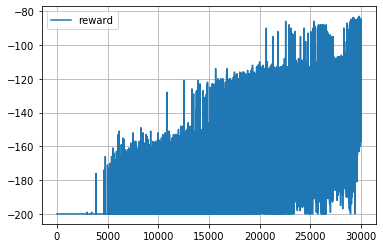

<Figure size 432x288 with 0 Axes>

In [3]:
"""Tabular Q-learning,
env = MountainCar-v0
Action space: Discrete
By: Behzad Khamidehi
"""


import gym
import numpy as np
import matplotlib.pyplot as plt

learning_rate = 0.4
epsilon = 0.5
gamma = 0.9
N_episodes = 30000
Start_epsilon_decaying=0
End_epsilon_decaying=N_episodes//1
epsilon_decaying= epsilon/(End_epsilon_decaying-Start_epsilon_decaying)
env = gym.make('MountainCar-v0')
env.reset()
done = False
#print(env.observation_space)
L_p = 100
L_v = 100
Number_of_discrete_states = [L_p,L_v]
Discrete_state_step = (env.observation_space.high -
                       env.observation_space.low)/Number_of_discrete_states

def Discreted_state(state):
    State_indices = (state - env.observation_space.low) / Discrete_state_step
    return State_indices.astype(np.int)

Q_table = np.random.rand(L_p,L_v,env.action_space.n)
#print(Q_table.shape)
Results = {'sum_reward':[],'episode':[]}
for i in range(N_episodes):
    if Start_epsilon_decaying < i < End_epsilon_decaying:
        epsilon -=epsilon_decaying

    sum_reward_per_episode = 0
    done = False
    cont_state = env.reset() #continuous state
    dis_state = Discreted_state(cont_state) #Discrete state
    while not done:
        #if i % 2000 ==0:
            #env.render()


        if np.random.rand() < epsilon:
            action = np.random.randint(env.action_space.n)
        else:
            action = np.argmax(Q_table[dis_state[0]][dis_state[1]][:])
        cont_next_state, reward, done , _ = env.step(action)
        sum_reward_per_episode += reward
        dis_next_state = Discreted_state(cont_next_state)
        max_Q_next = max(Q_table[dis_next_state[0]][dis_next_state[1]][:])
        old_Q = Q_table[dis_state[0]][dis_state[1]][action]
        Q_table[dis_state[0]][dis_state[1]][action] =\
            (1-learning_rate)*old_Q + learning_rate*(reward+gamma*max_Q_next)
        dis_state = dis_next_state
    #print(sum_reward_per_episode)
    Results['sum_reward'].append(sum_reward_per_episode)
    Results['episode'].append(i)

env.close()
plt.plot(Results['episode'],Results['sum_reward'],label='reward')
plt.grid(True)
plt.legend()
plt.show()
plt.savefig('Rewards')




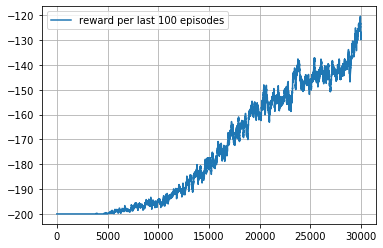

In [8]:
last100 = np.zeros(N_episodes)
for i in range(N_episodes):
  if i < 100:
    last100[i] = -200
  if i >= 100:
    R_100 = Results['sum_reward']
    last100[i] = np.mean(R_100[i-100:i])
plt.plot(Results['episode'],last100,label='reward per last 100 episodes')
plt.grid(True)
plt.legend()
plt.show()
